In [1]:
from pyspark import SparkContext

### creating a graph

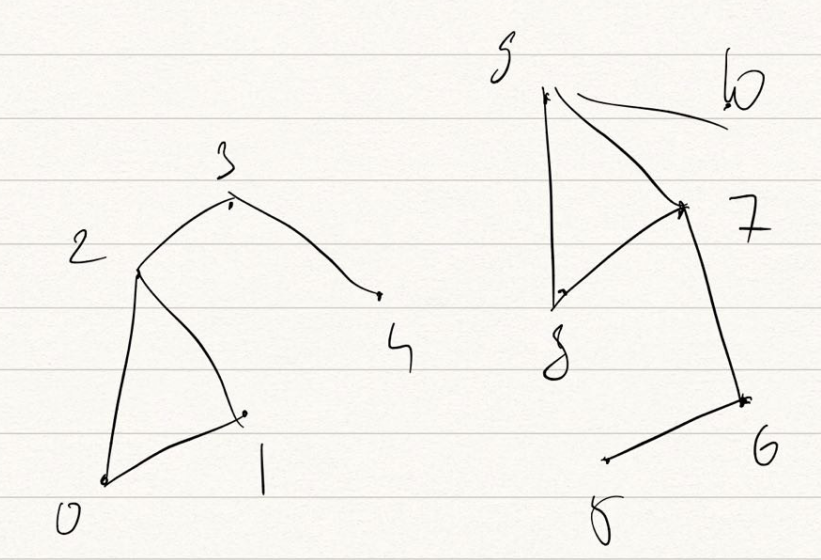

In [2]:
WRITE_GRAPH = False

if WRITE_GRAPH:
    a = [(0,1),(1,2),(0,2),(3,4),(2,3), (9,8),(9,7),(8,7),(9,10),(7,6),(6,5)]

    with open('../data.txt','w') as f:
        for line in a:
            f.write(f"{line[0]} {line[1]}\n")

In [63]:
sc = SparkContext(appName='A2')

In [64]:
lines = sc.textFile('../data.txt')

In [65]:
edges = lines.map(lambda x: tuple([int(y) for y in x.split(' ')]))

In [66]:
print(edges.collect())

[(0, 1), (1, 2), (0, 2), (3, 4), (2, 3), (9, 8), (9, 7), (8, 7), (9, 10), (7, 6), (6, 5)]


In [44]:
from operator import add

In [61]:
def iteration(rdf):
    one = rdf.mapValues(lambda x: [x])
    two = one.reduceByKey(add)
    three = two.map(lambda x: (min(x[1]), list(set([x[0]] + x[1]))) )
    four = three.flatMap(lambda x: [(x[0],y) for y in x[1]] + [(y, x[0]) for y in x[1]])
    return four

In [88]:
res = iteration(iteration(iteration(iteration(edges)))).mapValues(lambda x: [x]).reduceByKey(lambda x,y: list(set(x+y)))

In [95]:
res.collect()

[(0, [0, 1, 2, 3, 4]),
 (2, [0]),
 (4, [0]),
 (6, [5]),
 (8, [5]),
 (10, [5]),
 (1, [0]),
 (3, [0]),
 (5, [5, 6, 7, 8, 9, 10]),
 (7, [5]),
 (9, [5])]

In [100]:
res.flatMap(lambda x: [] if min(x[1]) < x[0] else [(x[0],x[1]))].collect()

[(0, [0, 1, 2, 3, 4]), (5, [5, 6, 7, 8, 9, 10])]

### idea - perform pointer jumping using min